<a href="https://colab.research.google.com/github/GrigoryBartosh/dul_2021/blob/main/Homework/hw8/Homework8_DRE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!if [ -d dul_2021 ]; then rm -Rf dul_2021; fi
!git clone https://github.com/GrigoryBartosh/dul_2021
!unzip -qq dul_2021/Homework/hw1/data/hw1_data.zip -d dul_2021/Homework/hw1/data/
!mv -v dul_2021/Homework/hw1/data/hw1_data/* dul_2021/Homework/hw1/data/
!rmdir dul_2021/Homework/hw1/data/hw1_data/
!pip install ./dul_2021

Cloning into 'dul_2021'...
remote: Enumerating objects: 281, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 281 (delta 68), reused 56 (delta 51), pack-reused 163
Receiving objects: 100% (281/281), 53.75 MiB | 13.99 MiB/s, done.
Resolving deltas: 100% (125/125), done.
renamed 'dul_2021/Homework/hw1/data/hw1_data/geoffrey-hinton.jpg' -> 'dul_2021/Homework/hw1/data/geoffrey-hinton.jpg'
renamed 'dul_2021/Homework/hw1/data/hw1_data/mnist_colored.pkl' -> 'dul_2021/Homework/hw1/data/mnist_colored.pkl'
renamed 'dul_2021/Homework/hw1/data/hw1_data/mnist.pkl' -> 'dul_2021/Homework/hw1/data/mnist.pkl'
renamed 'dul_2021/Homework/hw1/data/hw1_data/shapes_colored.pkl' -> 'dul_2021/Homework/hw1/data/shapes_colored.pkl'
renamed 'dul_2021/Homework/hw1/data/hw1_data/shapes.pkl' -> 'dul_2021/Homework/hw1/data/shapes.pkl'
renamed 'dul_2021/Homework/hw1/data/hw1_data/smiley.jpg' -> 'dul_2021/Homework/hw1/data/smiley.jpg'
Processing ./dul

In [2]:
from dul_2021.utils.hw8_utils import *

# Question 1. KMM

## Notations from practice

*   $p_{nu}(x)$ - pdf of numerator
*   $p_{de}(x)$ - pdf of denominator
*   $r(x)=\frac{p_{nu}(x)}{p_{de}(x)}$ - density ratio
*   $p_{nu}^*, p_{du}^*, r^*$ - estimatinos of respective functions
*   $\{x^{nu}_i\}_{i=1}^{n_{nu}}$ - sample from numerator distribution
*   $\{x^{de}_i\}_{i=1}^{n_{de}}$ - sample from denominator distribution



## KMM objective

Here we will implement Kernel Mean Matching (KMM) method for density ratio estimation. The basic idea of KMM is to 'match' expections of kernel function:

$$argmin_{r^*} ||E_{p_{de}}r^*(x)K(\cdot, x) - E_{p_{nu}}K(\cdot, x)||$$

Where $K(x, x') = exp(-\frac{|x-y|^2}{2\sigma^2})$. Emperical variant of this objective can be rewritten as follows:

$$argmin_{r^*} \frac{1}{n_{de}^2} (r^*_{de})^t K_{de, de} r^*_{de} - \frac{2}{n_{nu}n_{de} }(r^*_{de})^t K_{de, nu}1_{n_{nu}}$$

Where


*   $r^*_{de}$ - vector with $(r^*_{de})_i=r^*(x^{de}_i)$
*   $K_{de, de}$ - matrix with $(K_{de, de})_{i, j} = K(x^{de}_i, x^{de}_j)$
*   $K_{de, nu}$ - matrix with $(K_{de, nu})_{i, j} = K(x^{de}_i, x^{nu}_j)$
*   $1_{n_{nu}}$ - vector with $n_{nu}$ ones


## You will provide these deliverables
Density ratio on $[-2, 2]$.


<Figure size 432x288 with 0 Axes>

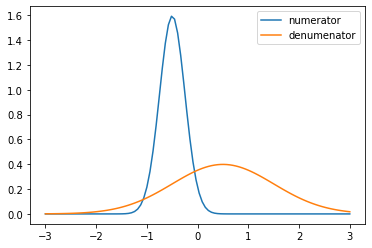

In [ ]:
# distributions

In [3]:
def get_kernel(X, Y):
    """
    X.shape = [N, M]
    Y.shape = [M]
    """
    K = X - Y
    K = np.power(K, 2)
    K = np.exp(-0.5 * K)

    return K

In [4]:
def main_objective(kdd, kdn, r):
    return r @ (kdd @ r) - 2 * r @ np.sum(kdn, axis=1)

In [5]:
from scipy.linalg import solve
from scipy.interpolate import interp1d

## Градиент равен нулю, отсюда сразу находим оптимум

In [ ]:
def q1_exact(data_nu, data_de):
  """
  data_nu - An [n_nu] dataset with samples from numerator's distribution
  data_de - An [n_de] dataset with samples from denominators's distribution
  
  Returns
    - a np.array with density ratios of np.linspace(-2., 2, num=100)
  """
  print(data_de.shape)
  print(data_nu.shape)

  # your code goes here
  d_util = np.expand_dims(data_de, 1)
  D_dd = np.repeat(d_util, data_de.shape[0], 1)
  D_dn = np.repeat(d_util, data_nu.shape[0], 1)

  K_dd = get_kernel(D_dd, data_de)
  print(f"K_dd.shape = {K_dd.shape}")
  K_dn = get_kernel(D_dn, data_nu)

  plt.hist(np.sum(K_dn, axis=1))
  plt.show()
  a = input("Dummy enter:")

  plt.hist(K_dd.flatten())
  plt.show()
  a = input("Dummy enter:")

  r = solve(K_dd, np.sum(K_dn, axis=1), assume_a="sym") # Так быстро не решается --> оптимизация
  r *= data_de.shape[0] / data_nu.shape[0]
  f = interp1d(data_de, r)

  # you need to calculate density ratio on x and return it
  X = np.linspace(-2., 2, num=100)
  return f(X)

## Покоординатный спуск

In [ ]:
def q1_coord(data_nu, data_de):
  """
  data_nu - An [n_nu] dataset with samples from numerator's distribution
  data_de - An [n_de] dataset with samples from denominators's distribution
  
  Returns
    - a np.array with density ratios of np.linspace(-2., 2, num=100)
  """
  print(data_de.shape)
  print(data_nu.shape)
  # your code goes here
  d_util = np.expand_dims(data_de, 1)
  D_dd = np.repeat(d_util, data_de.shape[0], 1)
  D_dn = np.repeat(d_util, data_nu.shape[0], 1)

  K_dd = get_kernel(D_dd, data_de)
  print(f"K_dd.shape = {K_dd.shape}")
  K_dn = get_kernel(D_dn, data_nu)

  r = np.ones(5000)
  b = np.sum(K_dn, axis=1)

  Z = []
  for epoch in range(100):
    for i in range(5000):
      a = K_dd[i] @ r + K_dd[:, i] @ r - 2 * K_dd[i, i] * r[i]
      r[i] = (2 * b[i] - a) / (2 * K_dd[i, i])

      if r[i] < 0:
        r[i] = 0

    #Z.append(main_objective(K_dd, K_dn, r))
    print(f"Max -- {np.max(np.abs(r))}")
    if (epoch + 1) % 100 == 0:
      print(f"Epoch -- {epoch + 1}")

  r *= data_de.shape[0] / data_nu.shape[0]
  f = interp1d(data_de, r, 'cubic')

  r_analyt = solve(K_dd, np.sum(K_dn, axis=1), assume_a="sym")
  r_analyt[r_analyt < 0] = 0

  plt.plot(data_de, r, 'ro')
  plt.show()

  plt.plot(data_de, r_analyt, 'go')
  plt.show()

  print(f"Difference = {np.sum(r_analyt - r)}")
  # you need to calculate density ratio on x and return it
  X = np.linspace(-2., 2, num=100)
  return f(X)

## Простой градиентный спуск (различный результат, если занулять отрицательные R!)

In [65]:
def q1_sgd(data_nu, data_de):
  """
  data_nu - An [n_nu] dataset with samples from numerator's distribution
  data_de - An [n_de] dataset with samples from denominators's distribution
  
  Returns
    - a np.array with density ratios of np.linspace(-2., 2, num=100)
  """
  # your code goes here
  d_util = np.expand_dims(data_de, 1)
  D_dd = np.repeat(d_util, data_de.shape[0], 1)
  D_dn = np.repeat(d_util, data_nu.shape[0], 1)

  K_dd = get_kernel(D_dd, data_de)
  K_dn = get_kernel(D_dn, data_nu)

  r = np.zeros(5000)
  b = np.sum(K_dn, axis=1)
  lr = 1e-4

  Z = []
  for epoch in range(10_000):
    grad = K_dd @ r - b
    r -= lr * grad
    Z.append(np.linalg.norm(grad))
    r[r < 0] = 0.
    if (epoch + 1) % 500 == 0:
      print(f"Epoch -- {epoch + 1}")

  plt.plot(np.log(Z))
  plt.title("Grad norm")
  plt.xlabel("Epoch")
  plt.ylabel("log(grad norm)")
  plt.show()

  f = interp1d(data_de, r)

  X = np.linspace(-2., 2, num=100)
  return f(X)

## Метод Ньютона

In [ ]:
def q1_newton(data_nu, data_de):
  """
  data_nu - An [n_nu] dataset with samples from numerator's distribution
  data_de - An [n_de] dataset with samples from denominators's distribution
  
  Returns
    - a np.array with density ratios of np.linspace(-2., 2, num=100)
  """
  print(data_de.shape)
  print(data_nu.shape)
  # your code goes here
  d_util = np.expand_dims(data_de, 1)
  D_dd = np.repeat(d_util, data_de.shape[0], 1)
  D_dn = np.repeat(d_util, data_nu.shape[0], 1)

  K_dd = get_kernel(D_dd, data_de)
  print(f"K_dd.shape = {K_dd.shape}")
  K_dn = get_kernel(D_dn, data_nu)

  r = np.ones(5000)
  b = np.sum(K_dn, axis=1)
  lr = 1e-4

  # Приближаем достаточно близко к оптимуму простым SGD
  Z = []
  for epoch in range(3_000):
    grad = K_dd @ r - b
    r -= lr * grad
    r[r < 0] = 0.
    Z.append(np.linalg.norm(grad))
    if (epoch + 1) % 500 == 0:
      print(f"Epoch -- {epoch + 1}")

  # Итерации по Нтьютону
  for epoch in range(200):
    grad = K_dd @ r - b
    d = solve(K_dd, -grad)
    r += 4e-7 * d
    Z.append(np.linalg.norm(grad))
    # r[r < 0] = 0.
    if (epoch + 1) % 100 == 0:
      print(f"Epoch -- {epoch + 1}")
    if (epoch + 1) % 20 == 0:
      plt.plot(data_de, r, 'ro')
      plt.show()



  plt.plot(np.log(Z))
  plt.show()

  f = interp1d(data_de, r)

  X = np.linspace(-2., 2, num=100)
  return f(X)

## Results

sum on diagonal = 5000.0
sum on diagonal = 2757.1908956307425
Epoch -- 500
Epoch -- 1000
Epoch -- 1500
Epoch -- 2000
Epoch -- 2500
Epoch -- 3000
Epoch -- 3500
Epoch -- 4000
Epoch -- 4500
Epoch -- 5000
Epoch -- 5500
Epoch -- 6000
Epoch -- 6500
Epoch -- 7000
Epoch -- 7500
Epoch -- 8000
Epoch -- 8500
Epoch -- 9000
Epoch -- 9500
Epoch -- 10000


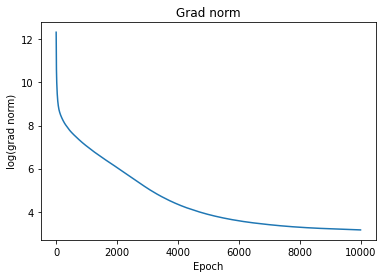

<Figure size 432x288 with 0 Axes>

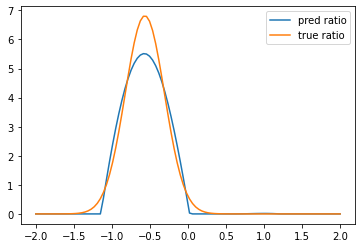

In [66]:
q1_results(q1_sgd) # оконачательн был выбран простой SGD

# Question 2. AVB

Here we will implement [Adversairal Variational Bayes](https://dl.acm.org/doi/pdf/10.5555/3305890.3305928).

You may experiment with different hyperparameters and architecture designs, but the following designs for the AVB architecture may be useful.

```
Classifier (T)
    Conv2d(1, 32, 3, 1, 1), 
    ReLU(),
    Conv2d(32, 64, 3, 2, 1),
    ReLU(), 
    Conv2d(64, 128, 3, 2, 1), 
    ReLU(), 
    Conv2d(128, 128, 3, 2, 1), 
    ReLU(),
    # reshape + add latent
    Linear(4 * 4 * 128 + ld, hd), 
    ReLU(),
    Linear(hd, hd), 
    ReLU(),
    Linear(hd, 1)


Encoder (E)

    Conv2d(1, 32, 3, 1, 1), 
    ReLU(),
    Conv2d(32, 64, 3, 2, 1),
    ReLU(), 
    Conv2d(64, 128, 3, 2, 1), 
    ReLU(), 
    Conv2d(128, 128, 3, 2, 1), 
    ReLU(), 
    # add noise + reshape
    Linear(4 * 4 * 128 + nd, ld)

Decoder (D)
    ConvTranspose2d(128, 128, 3, 2, 1), 
    ReLU(), 
    ConvTranspose2d(128, 64, 4, 2, 1), 
    ReLU(), 
    ConvTranspose2d(64, 32, 4, 2, 1), 
    ReLU(), 
    Conv2d(32, 1, 3, 1, 1)
    # reshape
    Linear(ld, 4 * 4 * 128), 
    ReLU()
```

**Reminder.** Objective for AVB

$$max_{\theta, \phi} E \log p_\theta(x|z_\phi(x)) - T(x, z_\phi(x))$$
$$max_{T} E_x \bigg(E_{q_\phi(z|x)} \log\big(\sigma (T(x, z))\big) + E_{p(z)} \log\big(1 - \sigma (T(x, z))\big)\bigg) $$

$\phi$ - parameters of encoder, $\theta$ - parameters of decoder


**You will provide the following deliverables**


1.   Over the course of training, record the elbo and loss of the classifier T ber batch.
2. Report the final test set performances of your final models
3. 100 samples from your trained AVB

## Utils for conv

In [3]:
import torch.nn as nn

In [4]:
class ConvReLU(nn.Module):
  def __init__(self, in_dim, out_dim, kernel=(3, 3), stride=2, padding=1):
    super().__init__()
    self.seq = nn.Sequential(nn.Conv2d(in_dim, out_dim, kernel, stride, padding),
                             nn.ReLU())
  
  def forward(self, x):
    return self.seq(x)

In [5]:
class ConvTransposeReLU(nn.Module):
  def __init__(self, in_dim, out_dim, kernel=4, stride=2, padding=1):
    super().__init__()
    self.seq = nn.Sequential(nn.ConvTranspose2d(in_dim, out_dim, kernel, stride, padding),
                             nn.ReLU())
  
  def forward(self, x):
    return self.seq(x)

## Main classes

In [6]:
class Classifier(nn.Module):
  def __init__(self, lat_dim=16, hid_dim=256):
    super().__init__()
    self.conv = nn.Sequential(ConvReLU(1, 32, stride=1),
                              ConvReLU(32, 64),
                              ConvReLU(64, 128),
                              ConvReLU(128, 128),
                              nn.Flatten())
    
    self.fcn_part = nn.Sequential(nn.Linear(4 * 4 * 128 + lat_dim, hid_dim),
                                  nn.ReLU(),
                                  nn.Linear(hid_dim, hid_dim),
                                  nn.ReLU(),
                                  nn.Linear(hid_dim, 1))

  def forward(self, x, z):
    x = self.conv(x)
    y = torch.cat([x, z], dim=1)
    y = self.fcn_part(y)
    return y

In [7]:
class Encoder(nn.Module):
  def __init__(self, lat_dim=16, noise_dim=40):
    super().__init__()
    self.downsample = nn.Sequential(ConvReLU(1, 32, stride=1),
                              ConvReLU(32, 64),
                              ConvReLU(64, 128),
                              ConvReLU(128, 128),
                              nn.Flatten())
    
    self.linear = nn.Linear(4 * 4 * 128 + noise_dim, lat_dim)

  def forward(self, x, ε):
    x = self.downsample(x)
    z = torch.cat([x, ε], dim=1)
    z = self.linear(z)
    return z

In [8]:
class Decoder(nn.Module):
  def __init__(self, lat_dim=16):
    super().__init__()
    self.linear = nn.Sequential(nn.Linear(lat_dim, 4 * 4 * 128), 
                                nn.ReLU())
    
    self.upsample = nn.Sequential(ConvTransposeReLU(128, 128, kernel=3),
                                  ConvTransposeReLU(128, 64),
                                  ConvTransposeReLU(64, 32),
                                  nn.Conv2d(32, 1, 3, 1, 1))
    

  def forward(self, z):
    z = self.linear(z)
    z = z.reshape(-1, 128, 4, 4)
    y = self.upsample(z)

    y = torch.clip(y, -1, 1)
    y = torch.abs(y)
    return y

## Hyperparameters

In [38]:
batch_size = 200
num_epochs = 15
latent_dim = 16
noise_dim = 16

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load data

In [40]:
data_dir = get_data_dir(1)
train_data, test_data = load_pickled_data(join(data_dir, 'mnist.pkl'))

In [41]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

train = torch.tensor(train_data, device=device).float().permute((0, 3, 1, 2))
test = torch.tensor(test_data, device=device).float().permute((0, 3, 1, 2))

class MNIST(Dataset):
    def __init__(self, mnist_tensor):
        self.data = mnist_tensor

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        return self.data[idx]

dataset_train = MNIST(train)
dataset_test = MNIST(test) 

train_data = DataLoader(dataset_train, batch_size=batch_size)
test_data = DataLoader(dataset_test, batch_size=batch_size)

## Plot parameters

In [13]:
plt.rcParams["axes.labelsize"] = 25.
plt.rcParams["xtick.labelsize"] = 20.
plt.rcParams["ytick.labelsize"] = 20.
plt.rcParams["legend.fontsize"] = 18.

plt.rcParams["figure.figsize"] = [16., 16.]

In [28]:
def gen_images(decoder, num_of_samples, latent_dim):
  """
  С помощью декодера генерирует num_of_samples изображений.
  """
  mean = torch.zeros(num_of_samples, latent_dim)
  std = torch.ones(num_of_samples, latent_dim)
  z_prior = torch.normal(mean, std).to(device)
  
  with torch.no_grad():
    generated = decoder(z_prior)
  
  generated = torch.permute(generated, (0, 2, 3, 1))
  images = generated.cpu().numpy()
  return images

## Train Loop

In [21]:
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR

In [42]:
T = Classifier().to(device)
E = Encoder(noise_dim=noise_dim).to(device)
D = Decoder().to(device)

sigmoid = nn.Sigmoid()
mse = nn.MSELoss()

opt_T = Adam(T.parameters(), 6e-5)
opt_E = Adam(E.parameters(), 6e-5)
opt_D = Adam(D.parameters(), 6e-5)

sched_T = StepLR(opt_T, 1, 0.95)
sched_E = StepLR(opt_E, 1, 0.95)
sched_D = StepLR(opt_D, 1, 0.95)

Iteration 100
	loss 1 -- 124.3168038725853
	loss 2 -- 8385.077682495117
Iteration 200
	loss 1 -- 60.592658162117004
	loss 2 -- 6606.479610443115
Iteration 300
	loss 1 -- 79.7305024266243
	loss 2 -- 5680.790111541748
Epoch : 1


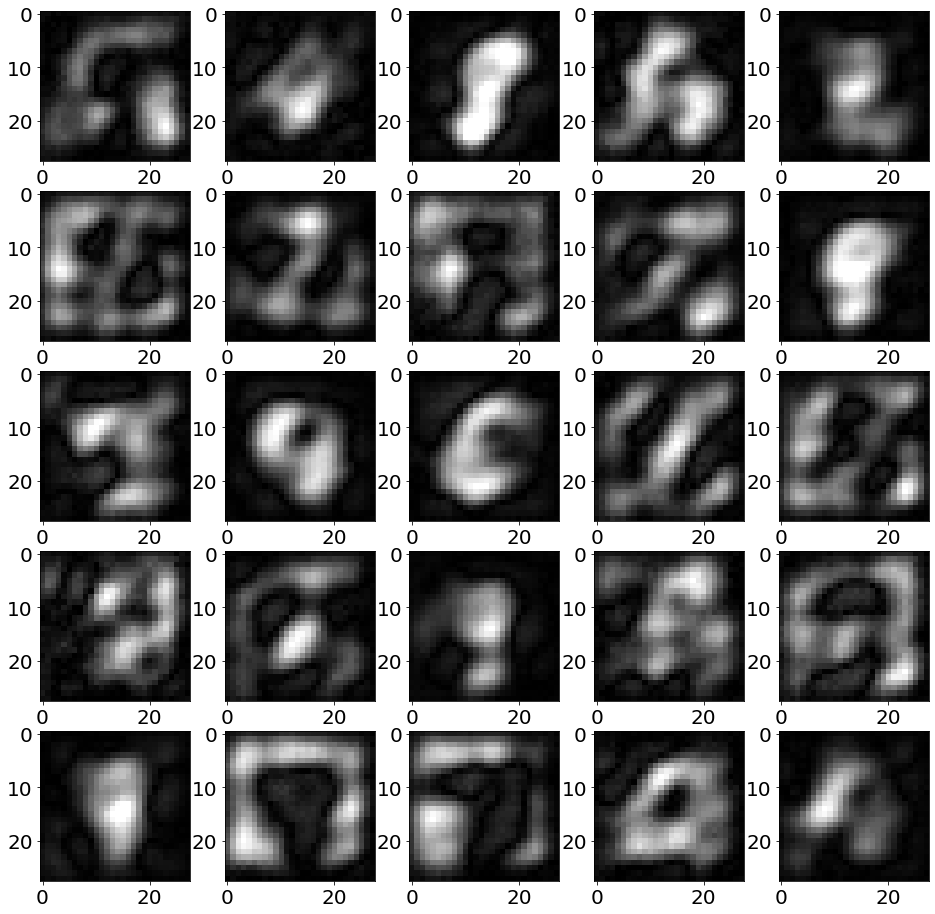

Iteration 100
	loss 1 -- 73.79247897863388
	loss 2 -- 4468.521659851074
Iteration 200
	loss 1 -- 63.71390336751938
	loss 2 -- 3912.1686935424805
Iteration 300
	loss 1 -- 55.17968475818634
	loss 2 -- 3635.023090362549
Epoch : 2


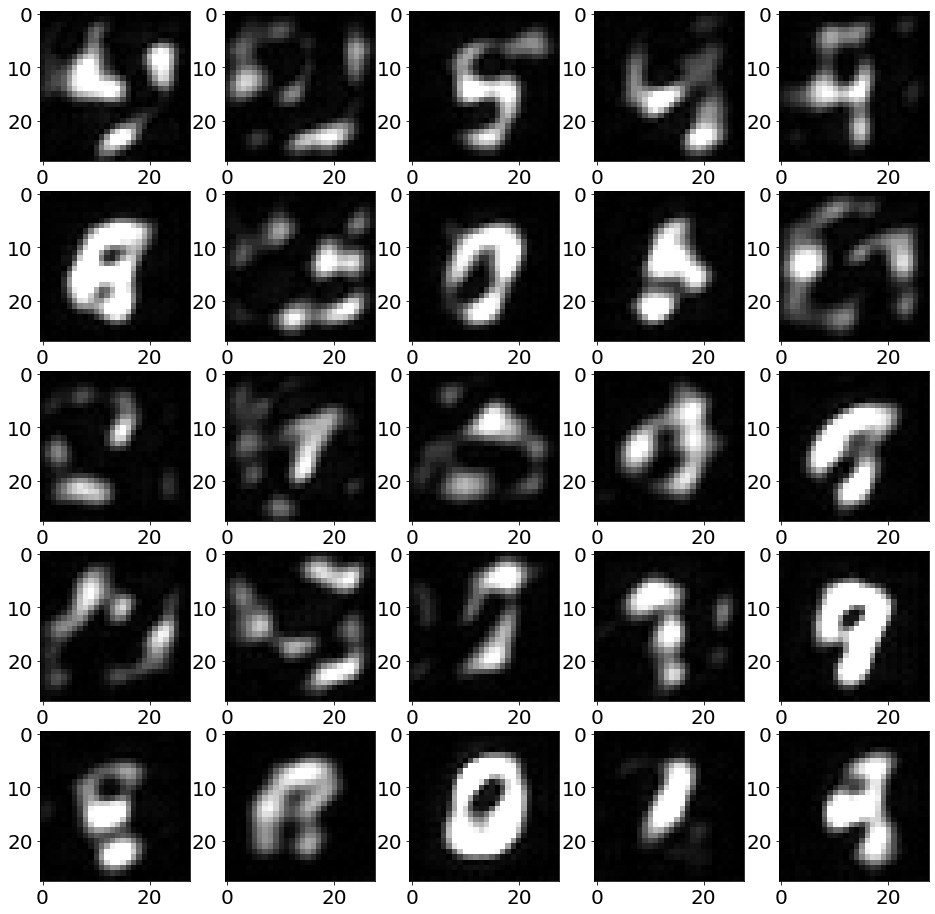

Iteration 100
	loss 1 -- 42.412655264139175
	loss 2 -- 3393.5242881774902
Iteration 200
	loss 1 -- 30.90581138432026
	loss 2 -- 3277.2773399353027
Iteration 300
	loss 1 -- 21.299148589372635
	loss 2 -- 3212.7693367004395
Epoch : 3


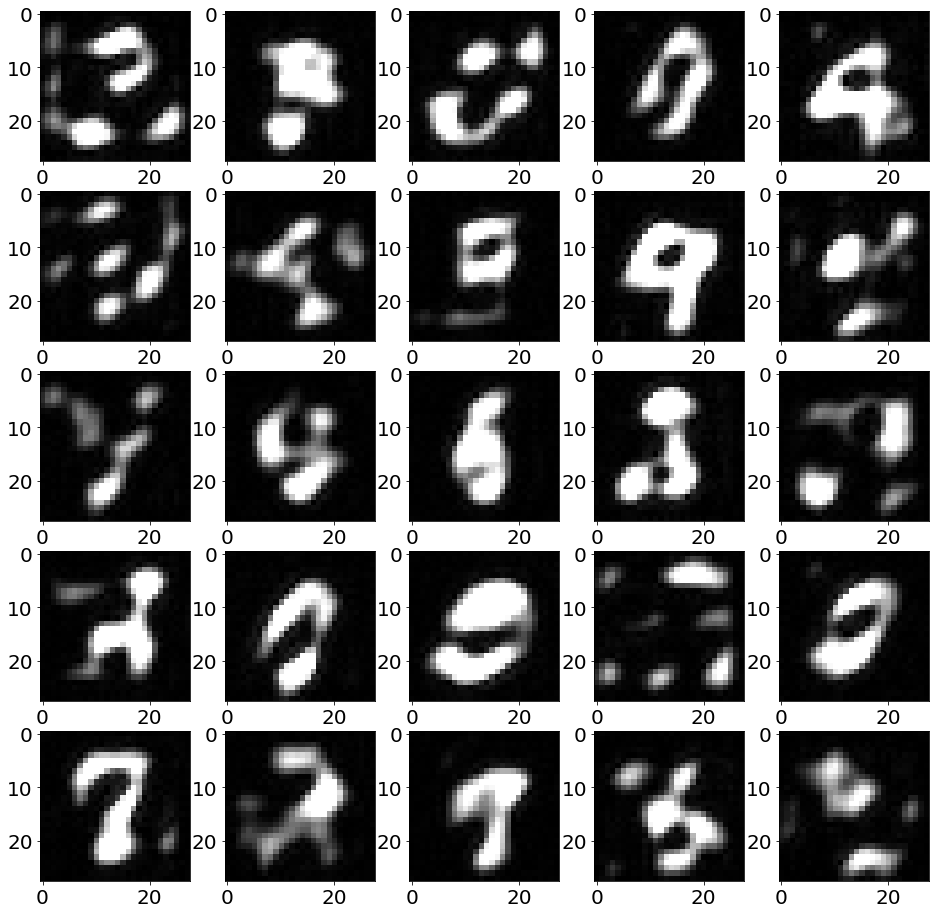

Iteration 100
	loss 1 -- 14.344682939350605
	loss 2 -- 3098.4173679351807
Iteration 200
	loss 1 -- 10.276885502040386
	loss 2 -- 3055.8868255615234
Iteration 300
	loss 1 -- 7.810363657772541
	loss 2 -- 3031.4789447784424
Epoch : 4


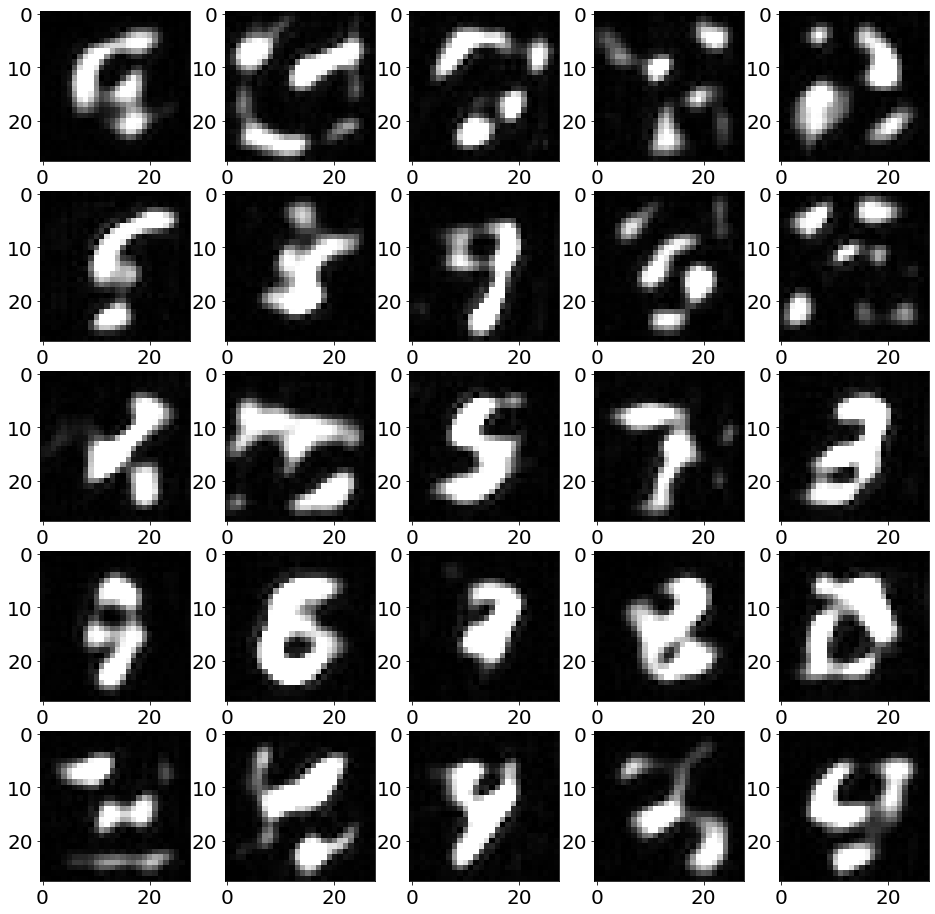

Iteration 100
	loss 1 -- 6.09622373431921
	loss 2 -- 2949.768753051758
Iteration 200
	loss 1 -- 4.849349174648523
	loss 2 -- 2940.8358211517334
Iteration 300
	loss 1 -- 3.9855025988072157
	loss 2 -- 2928.0632400512695
Epoch : 5


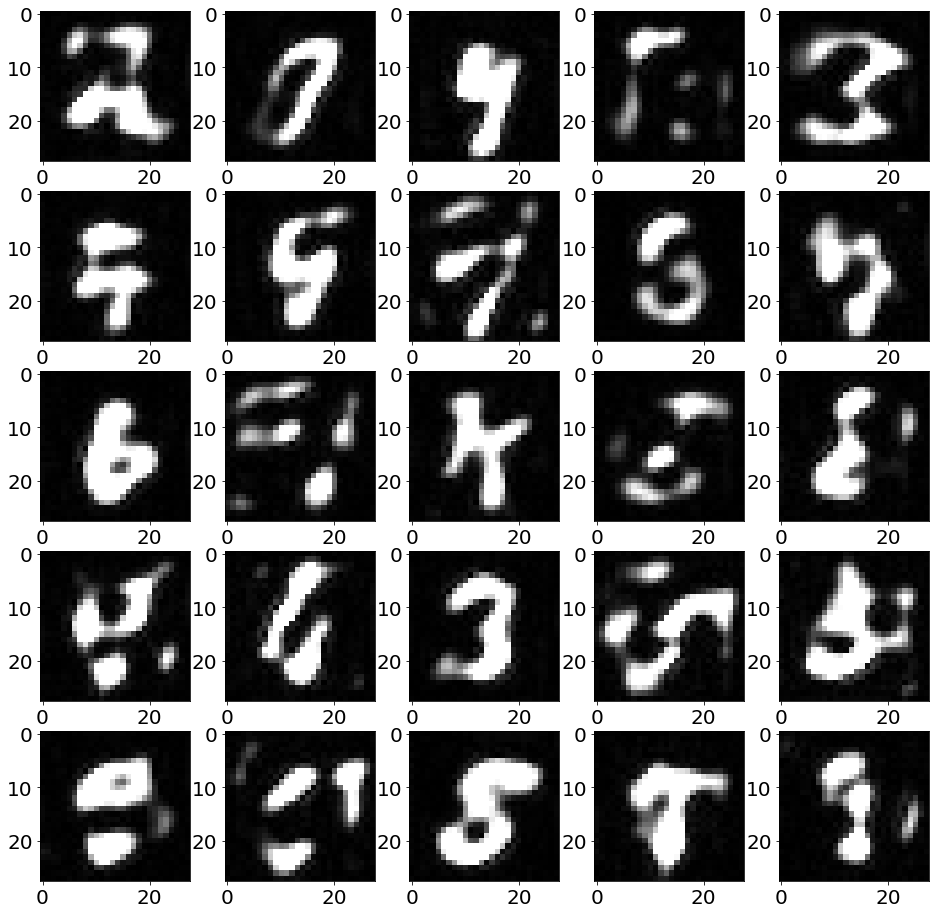

Iteration 100
	loss 1 -- 3.248600173741579
	loss 2 -- 2855.8791828155518
Iteration 200
	loss 1 -- 2.8118073157966137
	loss 2 -- 2854.9381713867188
Iteration 300
	loss 1 -- 2.482292177155614
	loss 2 -- 2847.55419921875
Epoch : 6


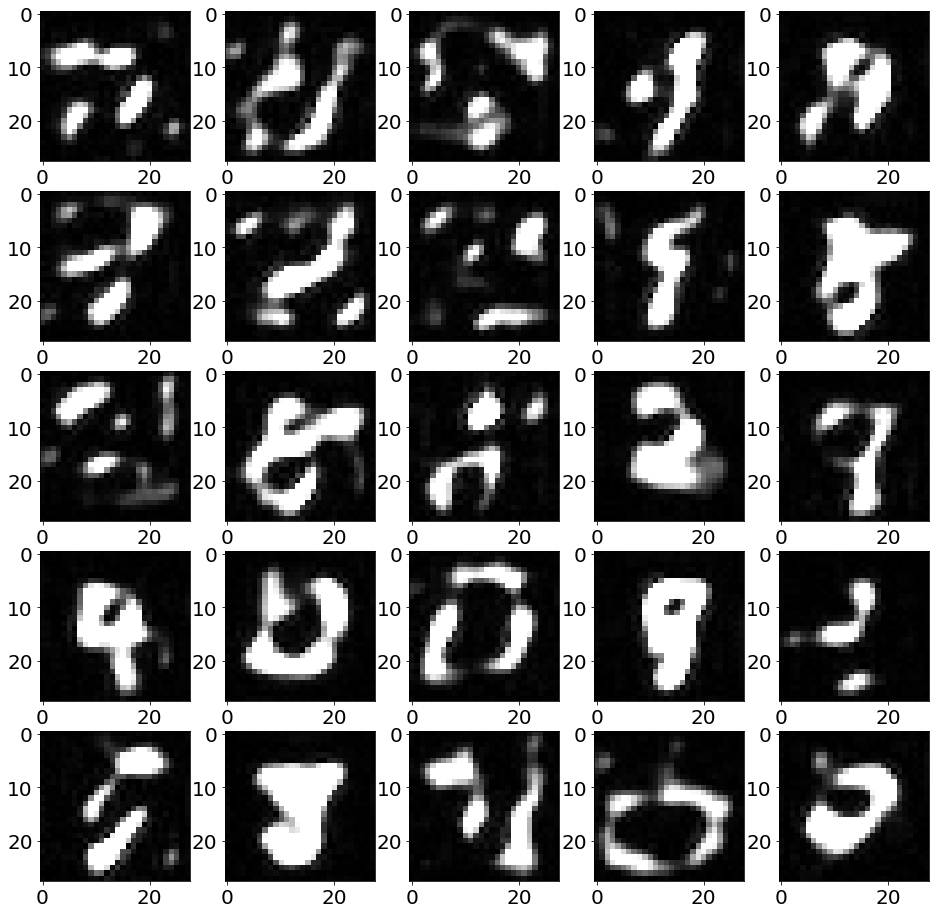

Iteration 100
	loss 1 -- 2.0780258318409324
	loss 2 -- 2784.76806640625
Iteration 200
	loss 1 -- 1.8812806503847241
	loss 2 -- 2793.414602279663
Iteration 300
	loss 1 -- 1.7301610969007015
	loss 2 -- 2789.6250553131104
Epoch : 7


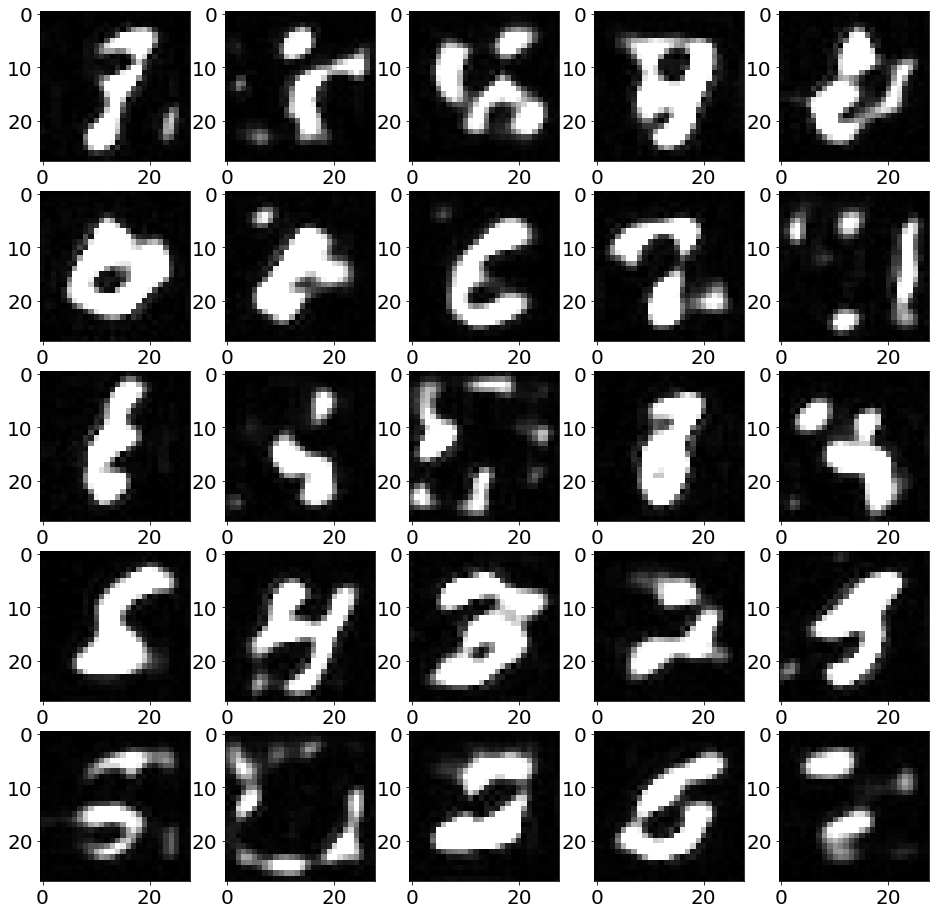

Iteration 100
	loss 1 -- 1.472441521473229
	loss 2 -- 2733.4849376678467
Iteration 200
	loss 1 -- 1.4689477253705263
	loss 2 -- 2741.656789779663
Iteration 300
	loss 1 -- 1.3142857570201159
	loss 2 -- 2743.38006401062
Epoch : 8


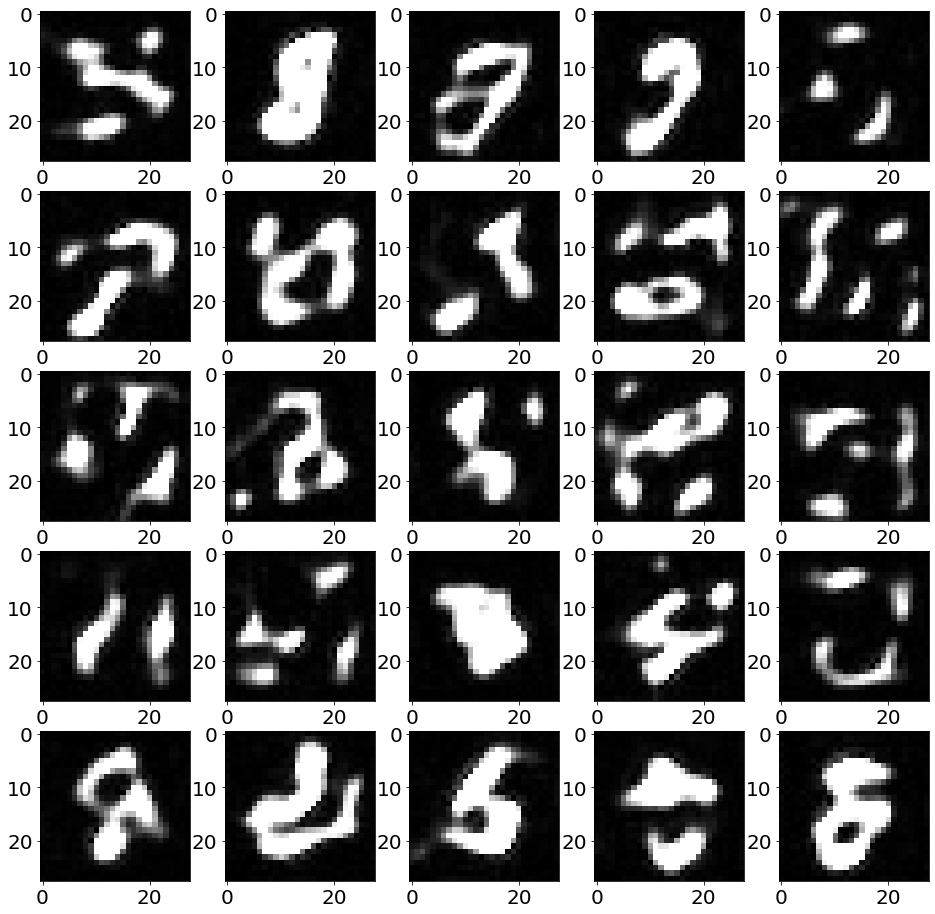

Iteration 100
	loss 1 -- 1.1664490550756454
	loss 2 -- 2692.3592796325684
Iteration 200
	loss 1 -- 1.0125204878859222
	loss 2 -- 2707.136329650879
Iteration 300
	loss 1 -- 0.966061919927597
	loss 2 -- 2709.032039642334
Epoch : 9


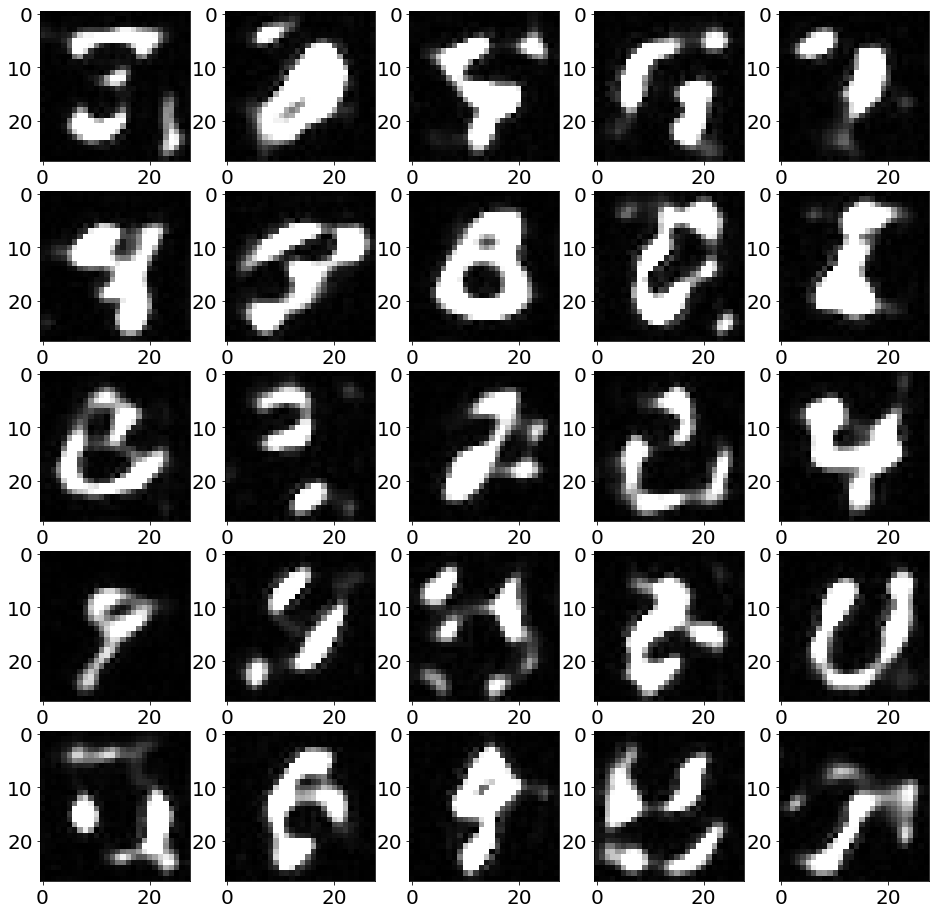

Iteration 100
	loss 1 -- 0.8464910620823503
	loss 2 -- 2658.861713409424
Iteration 200
	loss 1 -- 0.8252154528163373
	loss 2 -- 2669.5267696380615
Iteration 300
	loss 1 -- 0.7213474162854254
	loss 2 -- 2675.5023136138916
Epoch : 10


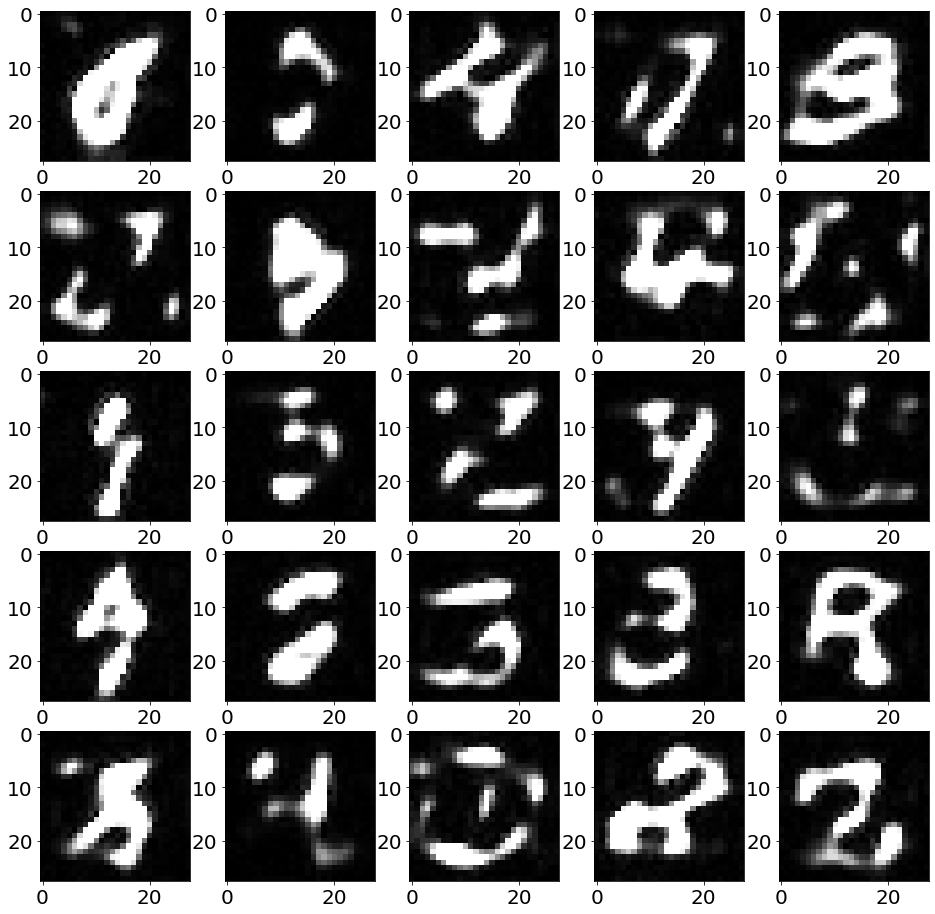

Iteration 100
	loss 1 -- 0.6947515495121479
	loss 2 -- 2625.3129692077637
Iteration 200
	loss 1 -- 0.6535135833546519
	loss 2 -- 2639.107225418091
Iteration 300
	loss 1 -- 0.6189209406729788
	loss 2 -- 2645.25386428833
Epoch : 11


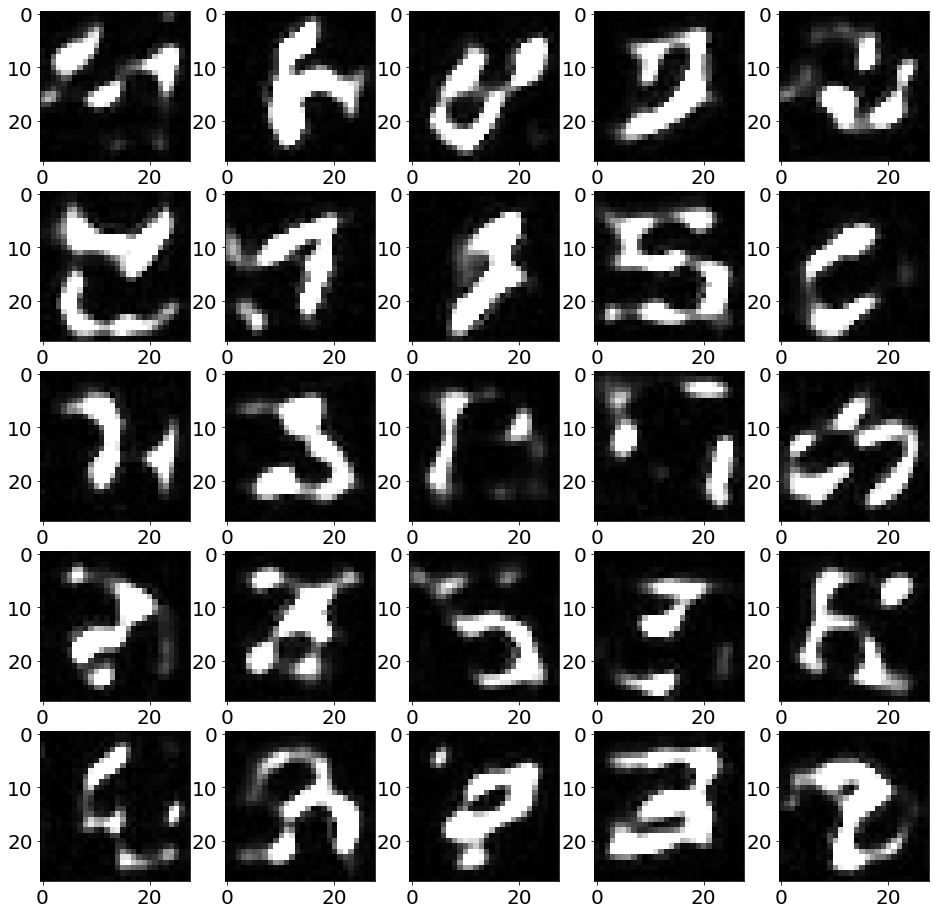

Iteration 100
	loss 1 -- 0.6059147622436285
	loss 2 -- 2602.7088356018066
Iteration 200
	loss 1 -- 0.5414584069512784
	loss 2 -- 2624.7728538513184
Iteration 300
	loss 1 -- 0.5234564044512808
	loss 2 -- 2621.678960800171
Epoch : 12


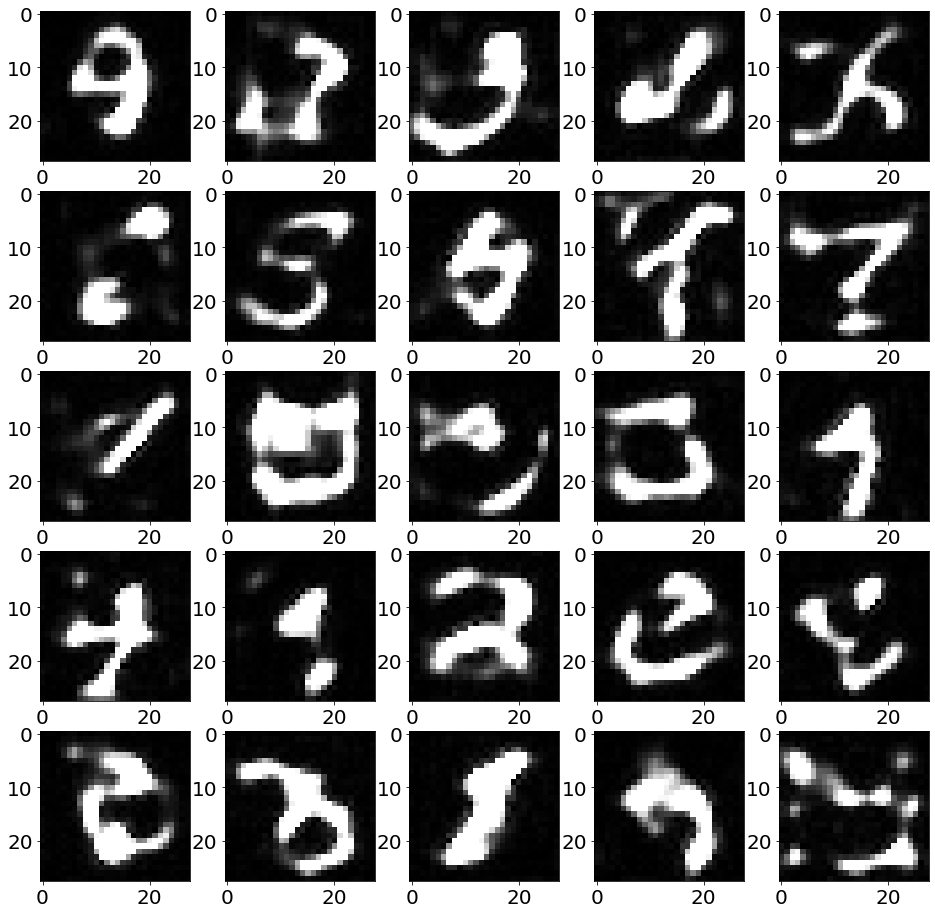

Iteration 100
	loss 1 -- 0.4818566993344575
	loss 2 -- 2583.004487991333
Iteration 200
	loss 1 -- 0.4927946433890611
	loss 2 -- 2596.700719833374
Iteration 300
	loss 1 -- 0.46825207583606243
	loss 2 -- 2601.1962966918945
Epoch : 13


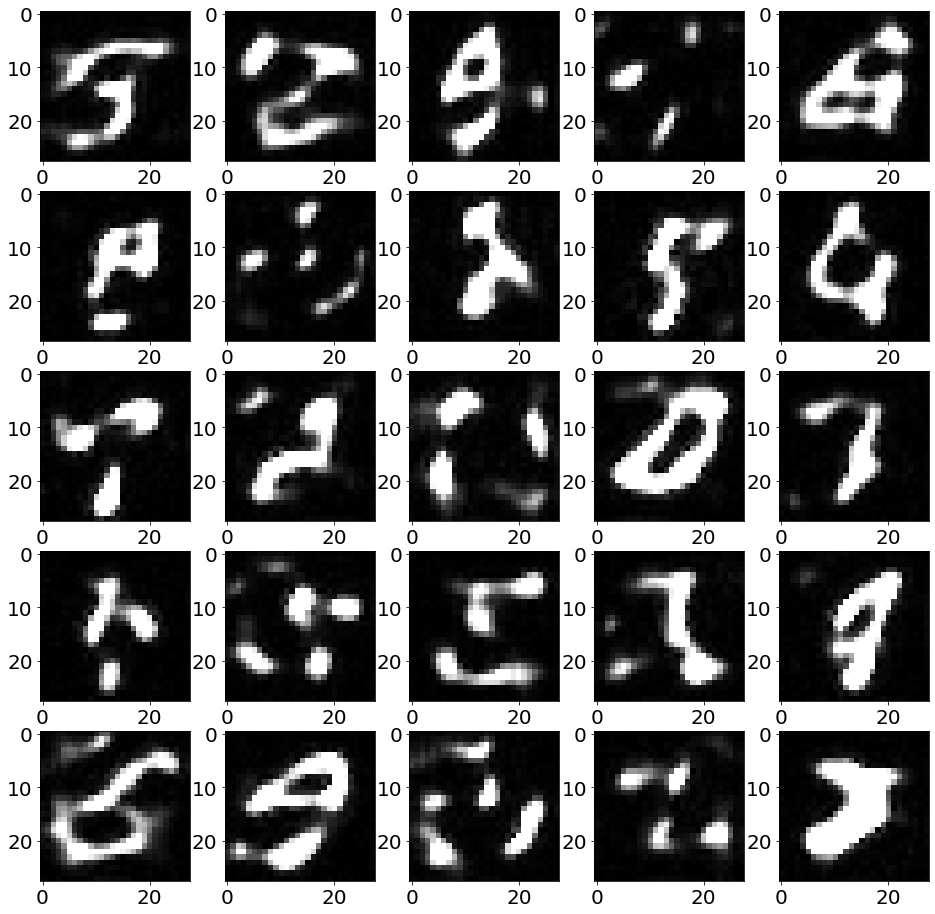

Iteration 100
	loss 1 -- 0.4318099308293313
	loss 2 -- 2566.4154262542725
Iteration 200
	loss 1 -- 0.3970534021500498
	loss 2 -- 2585.591236114502
Iteration 300
	loss 1 -- 0.408412653952837
	loss 2 -- 2590.981590270996
Epoch : 14


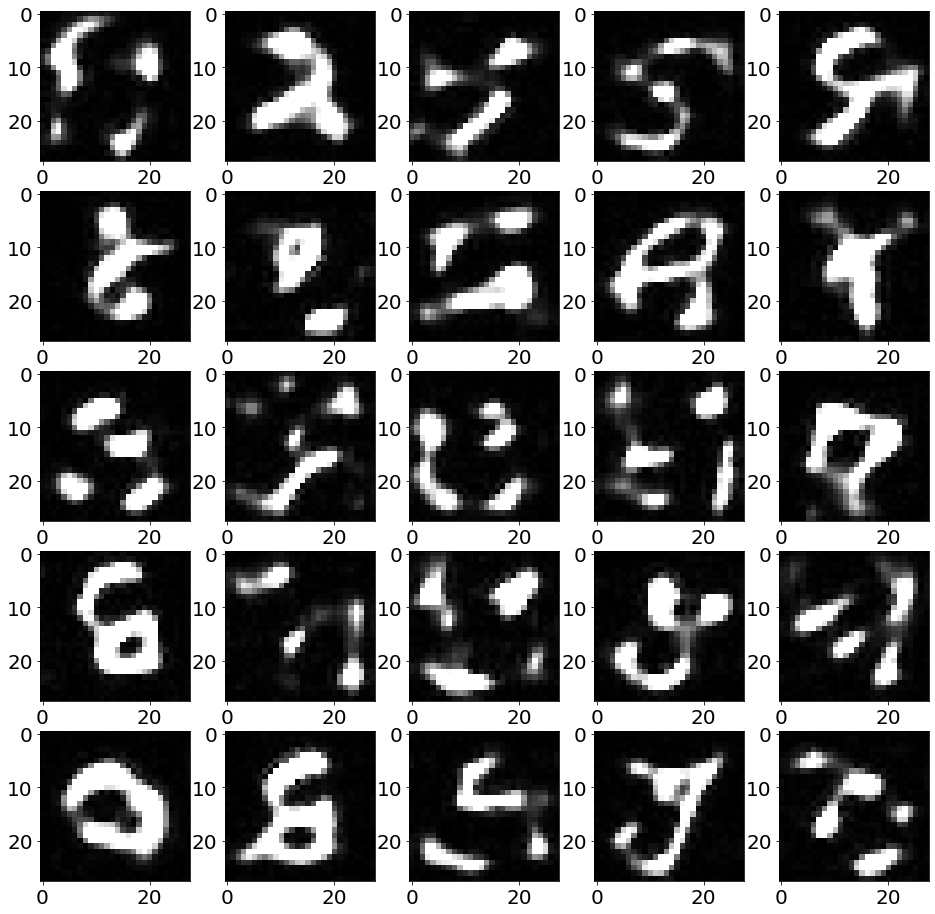

Iteration 100
	loss 1 -- 0.3531676400452852
	loss 2 -- 2561.40287399292
Iteration 200
	loss 1 -- 0.41034725098870695
	loss 2 -- 2575.2056045532227
Iteration 300
	loss 1 -- 0.36743713123723865
	loss 2 -- 2583.931074142456
Epoch : 15


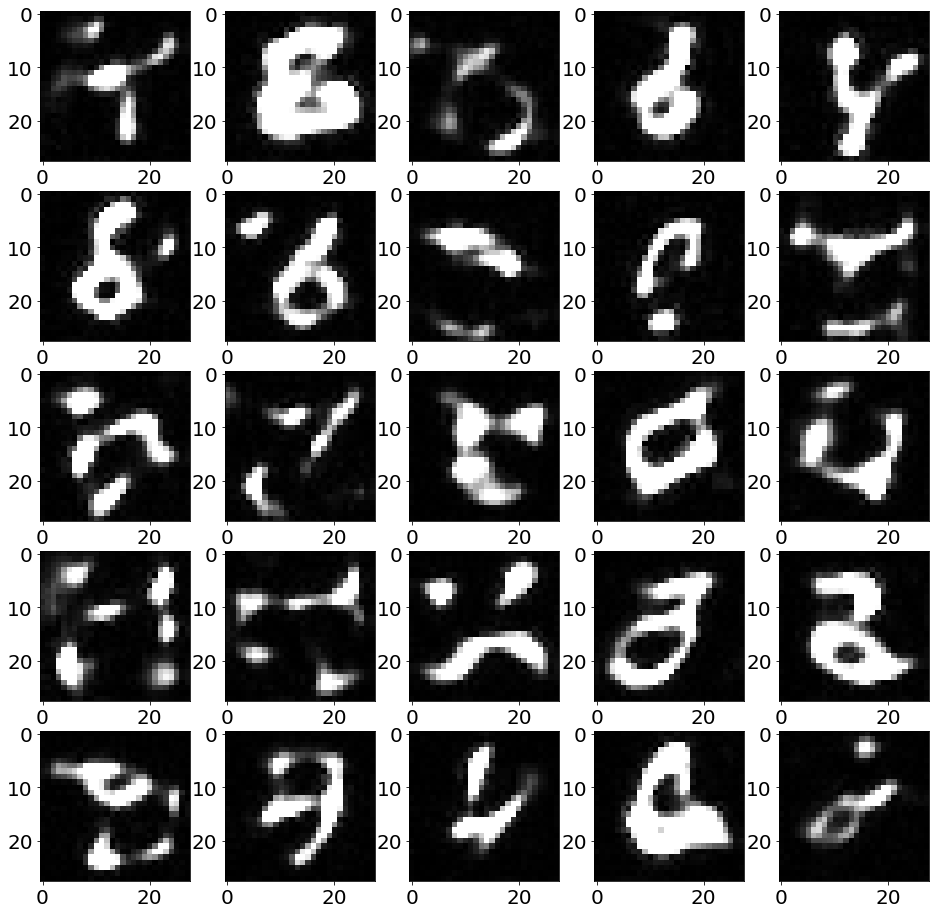

In [43]:
L, Q = 0, 0
train_elbo = []
train_clf = []

for epoch in range(num_epochs):
  for i, x in enumerate(train_data):

    ε = torch.normal(torch.zeros(batch_size, noise_dim), torch.ones(batch_size, noise_dim)).to(device)
    z = E(x, ε)
    z_clone = z.detach()

    t = T(x, z)
    decoded = D(z)

    # Encoder and Decoder losses
    opt_E.zero_grad()
    opt_D.zero_grad()
    loss_1 = mse(decoded, x) * 28 * 28 + t.mean()
    train_elbo.append(loss_1.cpu().item())
    Q += train_elbo[-1]

    loss_1.backward()
    opt_D.step()
    opt_E.step()

    # Classifier loss
    opt_T.zero_grad()
    z_prior = torch.normal(torch.zeros(batch_size, latent_dim), torch.ones(batch_size, latent_dim)).to(device)
    loss_2 = -torch.log(sigmoid(T(x, z_clone)) * (1 - sigmoid(T(x, z_prior))))
    loss_2 = loss_2.mean()
    train_clf.append(loss_2.cpu().item())
    L += train_clf[-1]
    loss_2.backward()
    opt_T.step()

    # Check-in-between
    if (i + 1) % 100 == 0:
      print(f"Iteration {i + 1}")
      print(f"\tloss 1 -- {L}")
      print(f"\tloss 2 -- {Q}")
      L, Q = 0, 0
  
  print(f"Epoch : {epoch + 1}")
  
  # Step of schedulers
  sched_T.step()
  sched_E.step()
  sched_D.step()

  # Generation
  images = gen_images(D, 25, latent_dim)

  images *= 255
  images = np.uint8(images)

  for i in range(5):
    for j in range(5):
      index = 5 * i + j
      plt.subplot(5, 5, index + 1)
      plt.imshow(images[index][:, :, 0], cmap='gray')

  plt.show()

## Results

In [44]:
def q2(train_data, test_data):
  """
  train_data - A (n_train, 28, 28, 1) uint8 numpy array of binary images with values in {0, 1}
   Returns
  - a (# of training iterations,) numpy array of elbo_losses evaluated every minibatch
  - a (# of training iterations,) numpy array of classifier_losses evaluated every minibatch
  - a torch tensor of size (100, 1, 28, 28) of samples with values in {0, 1}
  """
  # your code goes here
  images = gen_images(D, 100, latent_dim)
  images[images > .5] = 1.
  images[images <= .5] = 0.
  images = torch.tensor(images).permute((0, 3, 1, 2)).numpy()

  N = len(train_clf)
  
  return np.array(train_elbo), np.array(train_clf), [None] * N, [None] * N, images

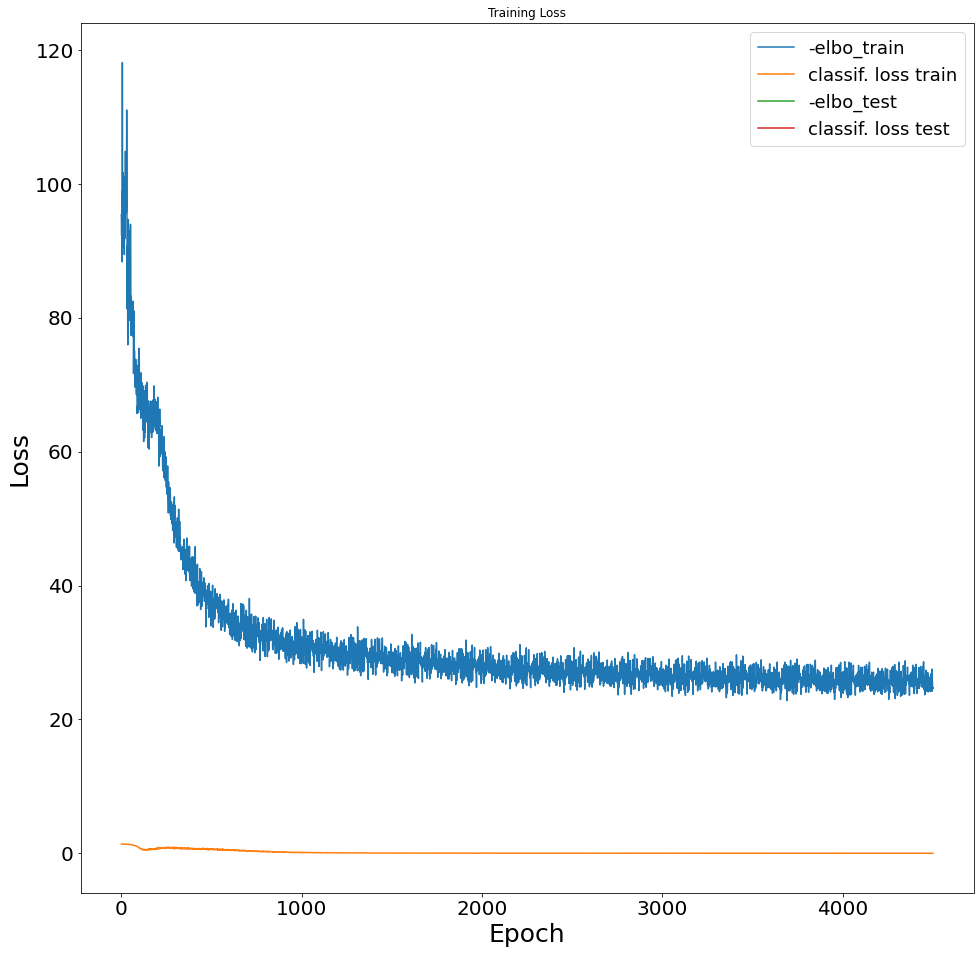

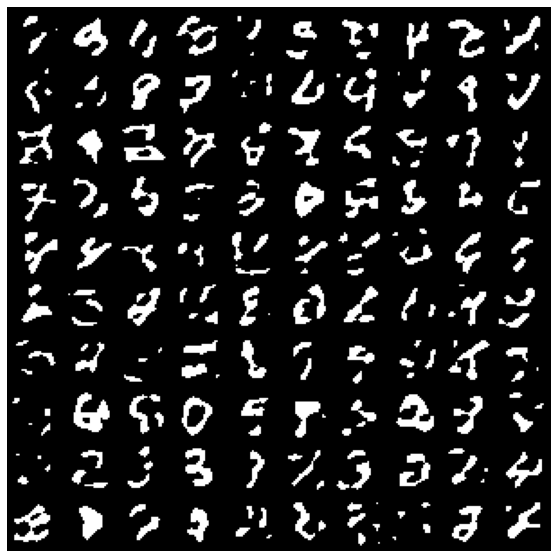

In [45]:
q2_results(q2)